# NLP fundamentals in Tensorflow

NLP has the goal of deriving information out of naturral language (could be sequences text or speech).

Another common term for NLP problem is sequence to sequence problems (seq2seq).

## Get helper functions

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-03-18 04:41:13--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-03-18 04:41:14 (86.9 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [ ]:
# Import series of helper functions for the notebook
from helper_functions import unzip_data, create_tensorboard_callback, plot_loss_curves, compare_historys

## Get a text dataset

The dataset we're going to be using is Kaggle's introduction to NLP dataset (textsamples of Tweets labelled as disaster or not disaster).

In [ ]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2023-03-18 04:41:17--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.161.128, 74.125.126.128, 74.125.70.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.161.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.004s  

2023-03-18 04:41:17 (136 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



## Visualizing a text dataset

In [ ]:
import pandas as pd

train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# Shuffle training dataframe
train_df_shuffled = train_df.sample(frac=1, random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# What does the test dataframe look like?
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
# How many examples of each class?
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [ ]:
# How many total samples?
len(train_df), len(test_df)

(7613, 3263)

In [ ]:
# Let's visualize some random training examples
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"Target: {target}", "{real disaster}" if target > 0 else "{not real disaster}")
  print(f"Text:\n{text}")
  print("---\n")

Target: 1 {real disaster}
Text:
Now Trending in Nigeria: Police charge traditional ruler others with informantÛªs  murder http://t.co/93inFxzhX0
---

Target: 1 {real disaster}
Text:
REPORTED: HIT &amp; RUN-IN ROADWAY-PROPERTY DAMAGE at 15901 STATESVILLE RD
---

Target: 1 {real disaster}
Text:
ohH NO FUKURODANI DIDN'T SURVIVE THE APOCALYPSE BOKUTO FEELS HORRIBLE  my poor boy my ppor child
---

Target: 1 {real disaster}
Text:
Maryland mansion fire that killed 6 caused by damaged plug under Christmas tree report says - Into the flames: Firefighter's bravery...
---

Target: 0 {not real disaster}
Text:
Interview with Actor Randy Irwin A.S.K What Could Be The Harm http://t.co/k14q8cHWKp
---



 ## Split data into traning and validation sets

In [ ]:
from sklearn.model_selection import train_test_split

# Use train_test_split to split traning_data into training and validation sets
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].tolist(),
                                                                            train_df_shuffled["target"].tolist(),
                                                                            test_size=0.1,
                                                                            random_state=42)

In [ ]:
# Check the lengths
len(train_sentences), len(val_sentences)

(6851, 762)

In [ ]:
# Check the first 10 samples
train_sentences[:10], train_labels[:10]

(['@mogacola @zamtriossu i screamed after hitting tweet',
  'Imagine getting flattened by Kurt Zouma',
  '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
  "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
  'Somehow find you and I collide http://t.co/Ee8RpOahPk',
  '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
  'destroy the free fandom honestly',
  'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
  '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
  'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
 [0, 0, 1, 0, 0, 1, 1, 0, 1, 1])

## Converting text into numbers

When dealing with a text problem, one of the first things you'll have to do before you can build a model is to convert your text to numbers because neural nets don't like anything other than numbers.

There are few ways to do this, namely:
* **Tokenization** - direct mapping of token (a token could be word or a character) to number
* **Embedding** -  create a matrix of feature vector for each token (the size of the feature vector can be defined and this embedding can be learned)

### Text Vectorization (tokenization)

In [ ]:
train_sentences[:5]

['@mogacola @zamtriossu i screamed after hitting tweet',
 'Imagine getting flattened by Kurt Zouma',
 '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
 "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
 'Somehow find you and I collide http://t.co/Ee8RpOahPk']

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization

# Use the default TextVectorization parameters
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary
                                    standardize="lower_and_strip_punctuation",
                                    split="whitespace",
                                    ngrams=None, # create groups of n-words? 
                                    output_mode="int", # how to map tokens to numbers 
                                    output_sequence_length=None, # how long do you want your sequences to be?
                                    )

In [ ]:
# Find the average number of tokens (words) in the training tweets
round(sum([len(i.split()) for i in train_sentences]) / len(train_sentences))

15

In [ ]:
# Setup text vectorization variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g how many words from a Tweet does a model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
# Adapting the text_vectorizer with the train_sentence
text_vectorizer.adapt(train_sentences)

In [ ]:
# Displaying the vocabulary
text_vectorizer.get_vocabulary()[:10]

['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is']

In [ ]:
# Create a sample sentence and tokenize it
sample_sentence = "There's a flood in my street!"
text_vectorizer([sample_sentence])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[264,   3, 232,   4,  13, 698,   0,   0,   0,   0,   0,   0,   0,
          0,   0]])>

In [ ]:
# Choose a random sentence from the training dataset and tokenize it
random_sentence = random.choice(train_sentences) 
print(f"Original text:\n {random_sentence}\
        \n\nVectorized version:")
text_vectorizer([random_sentence])

Original text:
 who said this? Yosemite Sam or Drumpf? ÛÏNobody Û÷ill vote for a flattened out rabbit skin a-huh huh Û_ I always sayÛ        

Vectorized version:


<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[  65,  205,   19, 6545, 8846,   53,    1, 6442, 6411, 1345,   10,
           3,  485,   36, 9399]])>

In [ ]:
# Get the unique words in the vocabulary 
words_in_vocab = text_vectorizer.get_vocabulary() # Get all the unique words in the training sentences
top_5_words = words_in_vocab[:5] # Get the top 5 most common words
bottom_5_words = words_in_vocab[-5:] # Get the least 5 common words
print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"5 most common words: {top_5_words}")
print(f"5 least common words: {bottom_5_words}")

Number of words in vocab: 10000
5 most common words: ['', '[UNK]', 'the', 'a', 'in']
5 least common words: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


## Creating an Embedding using an Embedding Layer

The parameters we care most about for our embedding layer:
* `input_dim` = the size of our vocabulary
* `output_dim` = the size of the output embedding vector, for example, a value of 100 would mean each token gets represented by a 100 dim vector
* `input_length` = length of the sequences being passed to the embedding layer

In [ ]:
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length,  # set input shape
                             output_dim=128,
                             input_length=max_length # how long is each input
                             )

In [ ]:
# Get a random sentence from the training set
random_sentence = random.choice(train_sentences) 
print(f"Original text:\n {random_sentence}\
        \n\nEmbedded version:")

# Embed the random sentence (turn it into dense vectors of fixed size)
sample_embedding = embedding(text_vectorizer([random_sentence]))
sample_embedding

Original text:
 Trafford Centre film fans angry after Odeon cinema evacuated following false fire alarm: 
 Twi... http://t.co/RYEQMxIrj8 #manchesterlite        

Embedded version:


<tf.Tensor: shape=(1, 15, 128), dtype=float32, numpy=
array([[[ 0.04713602,  0.02884141, -0.03171052, ..., -0.01195562,
         -0.04853659,  0.04361481],
        [ 0.02423072,  0.0284647 , -0.04813384, ...,  0.02059152,
          0.01533273,  0.00291647],
        [ 0.04128459, -0.02274512,  0.04856261, ...,  0.00381225,
         -0.03031751, -0.01574297],
        ...,
        [-0.04241501, -0.03606848, -0.01742632, ...,  0.00355338,
          0.03394656, -0.03856875],
        [-0.02584404, -0.01479262,  0.04758256, ..., -0.02283584,
          0.04258767, -0.01398493],
        [-0.01753848,  0.02919892, -0.01971569, ...,  0.04721974,
         -0.0126484 , -0.01198422]]], dtype=float32)>

## Modelling a text dataset (running a series of experiments)

Now we've got a way to turn out text sequences into numbers, it's time to start building a series of modelling experiments.

We'll start with as baseline and move on from there.

* Model 0: Naive Bayes (baseline)
* Model 1: Feed-forward neural network (dense model)
* Model 2: LSTM model (RNN)
* Model 3: GRU model (RNN)
* Model 4: Bidirectional_LSTM model (RNN)
* Model 5: 1D Convolutional Neural Network (CNN)
* Model 6: Tensorflow Hub Pretrained Feature Extractor (using transfer learning for NLP)
* Model 7: Same as model 6 with 10% of traning data

In [ ]:
# Model 0 Naive Bayes
from sklearn.feature_extraction.text import CountVectorizer 
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(train_sentences)
X_train_counts.shape

(6851, 20076)

In [ ]:
import itertools
dict(itertools.islice(count_vect.vocabulary_.items(), 5))

{'mogacola': 11723,
 'zamtriossu': 19875,
 'screamed': 15538,
 'after': 1515,
 'hitting': 8429}

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer 
tf_transformer = TfidfTransformer(use_idf=False).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts) 
X_train_tf.shape

(6851, 20076)

In [ ]:
from sklearn.naive_bayes import MultinomialNB 
clf = MultinomialNB().fit(X_train_tf, train_labels)

In [ ]:
new_data = ["God is love", "It was complete a disaster", "there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all"]
X_new_counts = count_vect.transform(new_data)
X_new_tf = tf_transformer.transform(X_new_counts)

predicted = clf.predict(X_new_tf)

for sentence, category in zip(new_data, predicted):
  print('%r => %s' % (sentence, category))

'God is love' => 0
'It was complete a disaster' => 0
'there is a forest fire at spot pond, geese are fleeing across the street, I cannot save them all' => 0


In [ ]:
# Evaluate our baseline model
print("Our baseline score:", clf.score(tf_transformer.transform(count_vect.transform(val_sentences)), val_labels) * 100)

Our baseline score: 78.34645669291339


In [ ]:
# Make predictions
baseline_preds = clf.predict(tf_transformer.transform(count_vect.transform(val_sentences)))
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
val_labels[:20]

[0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]

In [ ]:
# Building a model_0 pipeline
from sklearn.pipeline import Pipeline
model_0 = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

# Fit the model
model_0.fit(train_sentences, train_labels)

# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:20]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
# Build an evaluation function
from sklearn.metrics import precision_score, recall_score, accuracy_score
from helper_functions import make_confusion_matrix

def evaluation_function(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred) 
  recall = recall_score(y_true, y_pred)
  data = {
      "Accuracy score": np.round(accuracy, 2),
      "Precision score": np.round(precision, 2),
      "Recall score": np.round(recall, 2)
  }
  return data

In [ ]:
import numpy as np
baseline_metrics = evaluation_function(val_labels, baseline_preds)
baseline_metrics

{'Accuracy score': 0.79, 'Precision score': 0.89, 'Recall score': 0.63}

In [ ]:
# Model 1: Feed Forward Network
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers  

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

In [ ]:
# Create the model
inputs = layers.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dense(32, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = keras.Model(inputs, outputs)

model_1.summary()

# Compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Fit the model
model_1_history = model_1.fit(train_sentences,
                      train_labels,
                      epochs=20,
                      validation_data=(val_sentences, val_labels))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 dense (Dense)               (None, 15, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 15, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 15, 32)            2080      
                                                             

In [ ]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 1.0847 - accuracy: 0.7480


[1.0846940279006958, 0.748031497001648]

In [ ]:
y_pred_prob = model_1.predict(val_sentences)

24/24 [==============================] - 0s 3ms/step


In [ ]:
y_pred_prob.shape

(762, 1)

In [ ]:
preds = []
for x in y_pred_prob:
  if x >= 0.5:
    preds.append(1)
  else:
    preds.append(0)

In [ ]:
preds[:10]

[0, 1, 1, 0, 0, 1, 1, 1, 1, 0]

In [ ]:
val_labels[:10]

[0, 0, 1, 1, 1, 1, 1, 1, 1, 0]

In [ ]:
model_1_preds = tf.squeeze(tf.round(y_pred_prob))

In [ ]:
baseline_metrics

{'Accuracy score': 0.79, 'Precision score': 0.89, 'Recall score': 0.63}

In [ ]:
model_1_results = evaluation_function(val_labels, model_1_preds)
model_1_results

{'Accuracy score': 0.75, 'Precision score': 0.75, 'Recall score': 0.68}

(0.0, 1.1762775033712387)

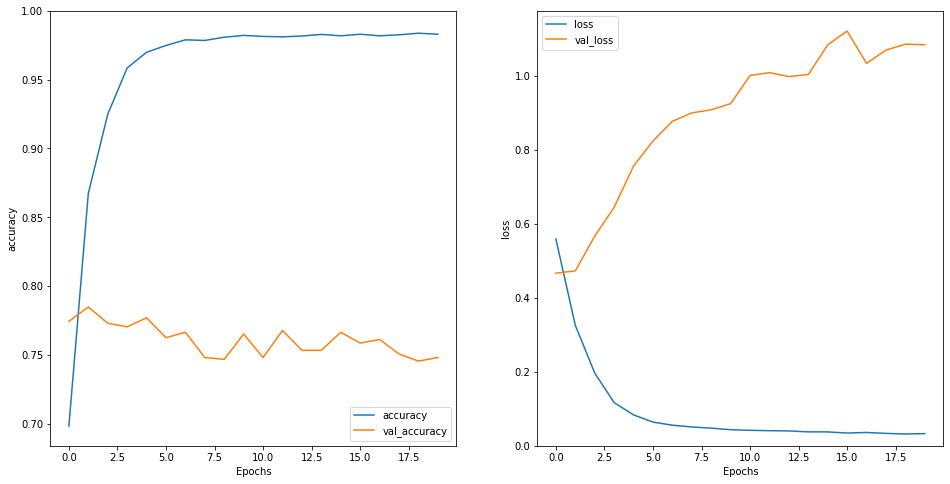

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(model_1_history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(model_1_history, 'loss')
plt.ylim(0, None)

### Visualizing learned embeddings

In [ ]:
# Get the vocabulary from the text vectorization layer
words_in_vocab = text_vectorizer.get_vocabulary()
len(words_in_vocab), words_in_vocab[:10]

(10000, ['', '[UNK]', 'the', 'a', 'in', 'to', 'of', 'and', 'i', 'is'])

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 dense (Dense)               (None, 15, 128)           16512     
                                                                 
 dense_1 (Dense)             (None, 15, 64)            8256      
                                                                 
 dense_2 (Dense)             (None, 15, 32)            2080      
                                                             

In [ ]:
# Get the weight matrix of embedding layer
# (these are the numerical representation of each token in our training data)
embed_weights = model_1.get_layer("embedding").get_weights()[0]
embed_weights.shape

(10000, 128)

In [ ]:
import io

out_v = io.open('vectors.tsv', 'w', encoding='utf-8')
out_m = io.open('metadata.tsv', 'w', encoding='utf-8')

for index, word in enumerate(words_in_vocab):
  if index == 0:
    continue  # skip 0, it's padding.
  vec = embed_weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [ ]:
# Model 2: (LSTM) A recurrent neural network
inputs = keras.Input(shape=(1,), dtype=tf.string) 
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.LSTM(64, return_sequences=True)(x)
x = layers.LSTM(32)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_2 = keras.Model(inputs, outputs)
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 lstm (LSTM)                 (None, 15, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                           

In [ ]:
# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_sentences,
            train_labels,
            epochs=10,
            validation_data=(val_sentences, val_labels))

Epoch 1/10
215/215 [==============================] - 16s 49ms/step - loss: 0.2610 - accuracy: 0.8977 - val_loss: 0.6122 - val_accuracy: 0.7690
Epoch 2/10
215/215 [==============================] - 2s 12ms/step - loss: 0.1364 - accuracy: 0.9527 - val_loss: 0.7662 - val_accuracy: 0.7625
Epoch 3/10
215/215 [==============================] - 3s 13ms/step - loss: 0.0811 - accuracy: 0.9648 - val_loss: 0.8524 - val_accuracy: 0.7612
Epoch 4/10
215/215 [==============================] - 2s 10ms/step - loss: 0.0657 - accuracy: 0.9743 - val_loss: 1.5147 - val_accuracy: 0.7441
Epoch 5/10
215/215 [==============================] - 2s 10ms/step - loss: 0.0577 - accuracy: 0.9755 - val_loss: 1.3776 - val_accuracy: 0.7415
Epoch 6/10
215/215 [==============================] - 2s 8ms/step - loss: 0.0536 - accuracy: 0.9768 - val_loss: 1.2733 - val_accuracy: 0.7572
Epoch 7/10
215/215 [==============================] - 2s 8ms/step - loss: 0.0441 - accuracy: 0.9800 - val_loss: 1.4213 - val_accuracy: 0.7507


(0.0, 1.735187555477023)

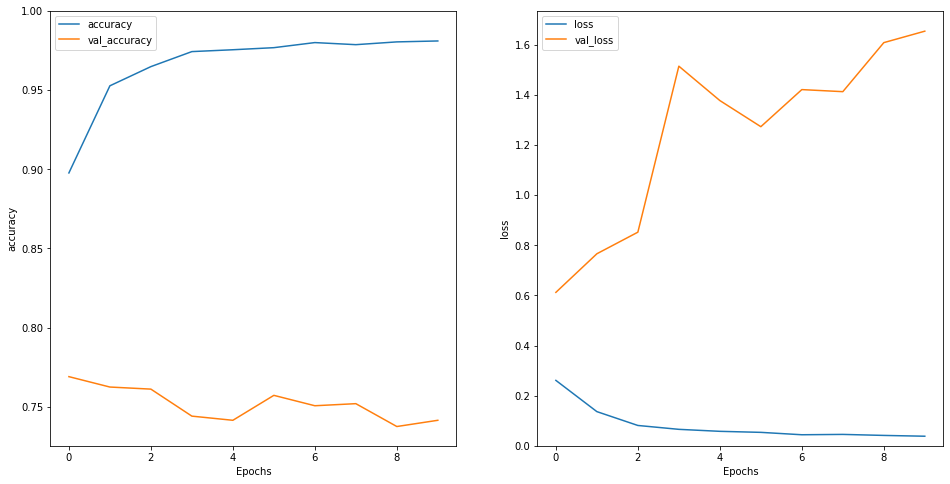

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history_2, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_2, 'loss')
plt.ylim(0, None)

In [ ]:
model_2_preds = tf.squeeze(tf.round(model_2.predict(val_sentences)))
model_2_preds[:5].numpy()

24/24 [==============================] - 1s 3ms/step


array([0., 1., 1., 0., 0.], dtype=float32)

In [ ]:
model_2_results = evaluation_function(val_labels, model_2_preds)
model_2_results

{'Accuracy score': 0.74, 'Precision score': 0.74, 'Recall score': 0.68}

In [ ]:
baseline_metrics

{'Accuracy score': 0.79, 'Precision score': 0.89, 'Recall score': 0.63}

In [ ]:
# Nodel_3: GRU RNN
inputs = keras.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GRU(512, return_sequences=True)(x)
x = layers.GRU(128, return_sequences=True)(x)
x = layers.GRU(64, return_sequences=True)(x)
x = layers.GRU(32)(x)
x = layers.Dense(64, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = keras.Model(inputs, outputs, name="model_3")
model_3.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 gru (GRU)                   (None, 15, 512)           986112    
                                                                 
 gru_1 (GRU)                 (None, 15, 128)           246528    
                                                                 
 gru_2 (GRU)                 (None, 15, 64)            37248     
                                                           

In [ ]:
# Compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_sentences,
                        train_labels,
                        epochs=10,
                        validation_data=(val_sentences, val_labels))

Epoch 1/10
215/215 [==============================] - 18s 48ms/step - loss: 0.1612 - accuracy: 0.9456 - val_loss: 0.9055 - val_accuracy: 0.7454
Epoch 2/10
215/215 [==============================] - 3s 16ms/step - loss: 0.0676 - accuracy: 0.9753 - val_loss: 1.2583 - val_accuracy: 0.7507
Epoch 3/10
215/215 [==============================] - 3s 14ms/step - loss: 0.0628 - accuracy: 0.9742 - val_loss: 1.5348 - val_accuracy: 0.7323
Epoch 4/10
215/215 [==============================] - 3s 14ms/step - loss: 0.0637 - accuracy: 0.9756 - val_loss: 1.3645 - val_accuracy: 0.7441
Epoch 5/10
215/215 [==============================] - 3s 12ms/step - loss: 0.0586 - accuracy: 0.9775 - val_loss: 1.1451 - val_accuracy: 0.7428
Epoch 6/10
215/215 [==============================] - 2s 12ms/step - loss: 0.0480 - accuracy: 0.9772 - val_loss: 1.1347 - val_accuracy: 0.7507
Epoch 7/10
215/215 [==============================] - 3s 13ms/step - loss: 0.0394 - accuracy: 0.9812 - val_loss: 1.5329 - val_accuracy: 0.740

(0.0, 1.847862358391285)

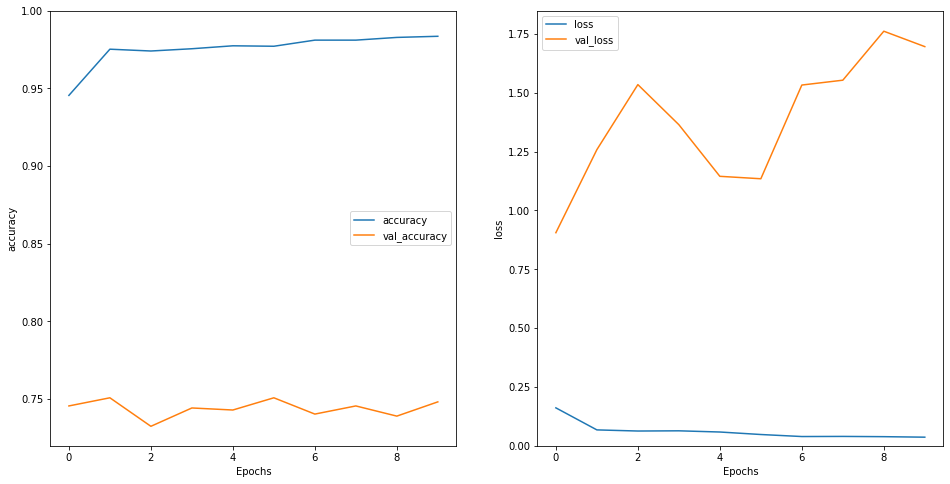

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history_3, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_3, 'loss')
plt.ylim(0, None)

In [ ]:
model_3_preds = tf.squeeze(tf.round(model_3.predict(val_sentences)))
model_3_preds[:5].numpy()

24/24 [==============================] - 1s 5ms/step


array([0., 1., 1., 0., 0.], dtype=float32)

In [ ]:
model_3_results = evaluation_function(val_labels, model_3_preds)
model_3_results

{'Accuracy score': 0.75, 'Precision score': 0.73, 'Recall score': 0.71}

In [ ]:
baseline_metrics

{'Accuracy score': 0.79, 'Precision score': 0.89, 'Recall score': 0.63}

In [ ]:
# Model_4: Bidirectional
inputs = keras.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = keras.Model(inputs, outputs)

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Fit the model
history_4 = model_4.fit(train_sentences, 
                        train_labels,
                        epochs=10, 
                        validation_data=(val_sentences, val_labels))

Epoch 1/10
215/215 [==============================] - 13s 43ms/step - loss: 0.1333 - accuracy: 0.9524 - val_loss: 1.1412 - val_accuracy: 0.7612
Epoch 2/10
215/215 [==============================] - 2s 11ms/step - loss: 0.0435 - accuracy: 0.9790 - val_loss: 1.1327 - val_accuracy: 0.7625
Epoch 3/10
215/215 [==============================] - 3s 13ms/step - loss: 0.0334 - accuracy: 0.9838 - val_loss: 1.5174 - val_accuracy: 0.7480
Epoch 4/10
215/215 [==============================] - 2s 8ms/step - loss: 0.0329 - accuracy: 0.9829 - val_loss: 1.3633 - val_accuracy: 0.7441
Epoch 5/10
215/215 [==============================] - 2s 9ms/step - loss: 0.0319 - accuracy: 0.9844 - val_loss: 1.5296 - val_accuracy: 0.7493
Epoch 6/10
215/215 [==============================] - 2s 11ms/step - loss: 0.0313 - accuracy: 0.9837 - val_loss: 1.5702 - val_accuracy: 0.7533
Epoch 7/10
215/215 [==============================] - 2s 10ms/step - loss: 0.0293 - accuracy: 0.9850 - val_loss: 1.6562 - val_accuracy: 0.7480


(0.0, 1.840278113540262)

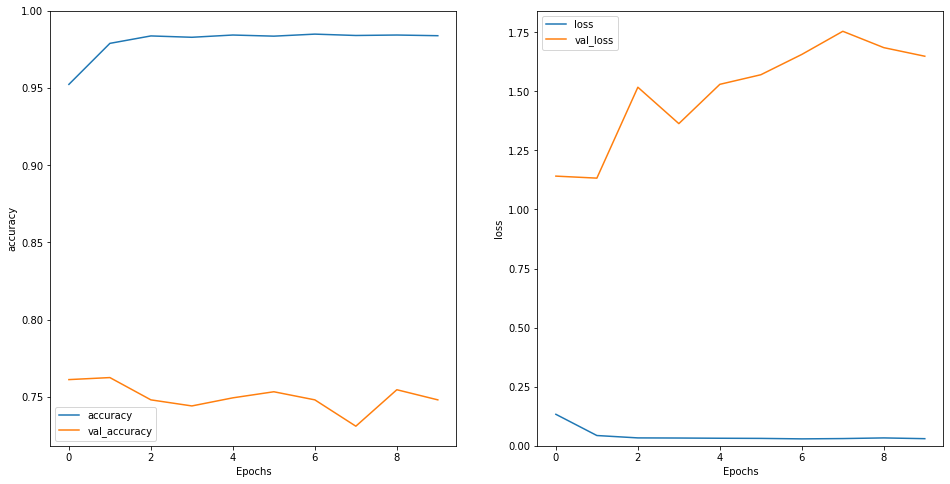

In [ ]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history_4, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history_4, 'loss')
plt.ylim(0, None)

In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4.predict(val_sentences)))
model_4_preds[:5].numpy()

24/24 [==============================] - 1s 3ms/step


array([0., 1., 1., 1., 0.], dtype=float32)

In [ ]:
model_4_results = evaluation_function(val_labels, model_4_preds)
model_4_results

{'Accuracy score': 0.75, 'Precision score': 0.74, 'Recall score': 0.7}

In [ ]:
baseline_metrics

{'Accuracy score': 0.79, 'Precision score': 0.89, 'Recall score': 0.63}

In [ ]:
# Model 5: 1D Convoluations
inputs = keras.Input(shape=(1,), dtype=tf.string)
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Conv1D(64, 3, padding="causal", activation="relu")(x)
x = layers.MaxPooling1D(2)(x)
x = layers.Conv1D(32, 3, padding="causal")(x) 
x = layers.GlobalMaxPooling1D()(x) 
outputs = layers.Dense(1, activation="sigmoid")(x)
model_5 = keras.Model(inputs, outputs, name="model_5")
model_5.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization_1 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding (Embedding)       (None, 15, 128)           1280000   
                                                                 
 conv1d (Conv1D)             (None, 15, 64)            24640     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 7, 64)            0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 7, 32)             6176

In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Fit the model
history_5 = model_5.fit(train_sentences,
            train_labels,
            epochs=10,
            validation_data=(val_sentences, val_labels))

Epoch 1/10
215/215 [==============================] - 15s 41ms/step - loss: 0.1372 - accuracy: 0.9521 - val_loss: 0.9645 - val_accuracy: 0.7454
Epoch 2/10
215/215 [==============================] - 3s 12ms/step - loss: 0.0595 - accuracy: 0.9747 - val_loss: 1.0821 - val_accuracy: 0.7441
Epoch 3/10
215/215 [==============================] - 2s 8ms/step - loss: 0.0461 - accuracy: 0.9804 - val_loss: 1.2016 - val_accuracy: 0.7441
Epoch 4/10
215/215 [==============================] - 2s 7ms/step - loss: 0.0393 - accuracy: 0.9825 - val_loss: 1.3269 - val_accuracy: 0.7415
Epoch 5/10
215/215 [==============================] - 1s 7ms/step - loss: 0.0373 - accuracy: 0.9823 - val_loss: 1.4649 - val_accuracy: 0.7323
Epoch 6/10
215/215 [==============================] - 1s 6ms/step - loss: 0.0342 - accuracy: 0.9834 - val_loss: 1.5366 - val_accuracy: 0.7402
Epoch 7/10
215/215 [==============================] - 2s 8ms/step - loss: 0.0325 - accuracy: 0.9838 - val_loss: 1.6477 - val_accuracy: 0.7441
Epo

In [ ]:
def model_results(history, model):
  plt.figure(figsize=(16, 8))
  plt.subplot(1, 2, 1)
  plot_graphs(history_4, 'accuracy')
  plt.ylim(None, 1)
  plt.subplot(1, 2, 2)
  plot_graphs(history_4, 'loss')
  plt.ylim(0, None)
  plt.show()
  model_preds = tf.squeeze(tf.round(model.predict(val_sentences)))
  model_results = evaluation_function(val_labels, model_preds)
  return model_preds, model_results 

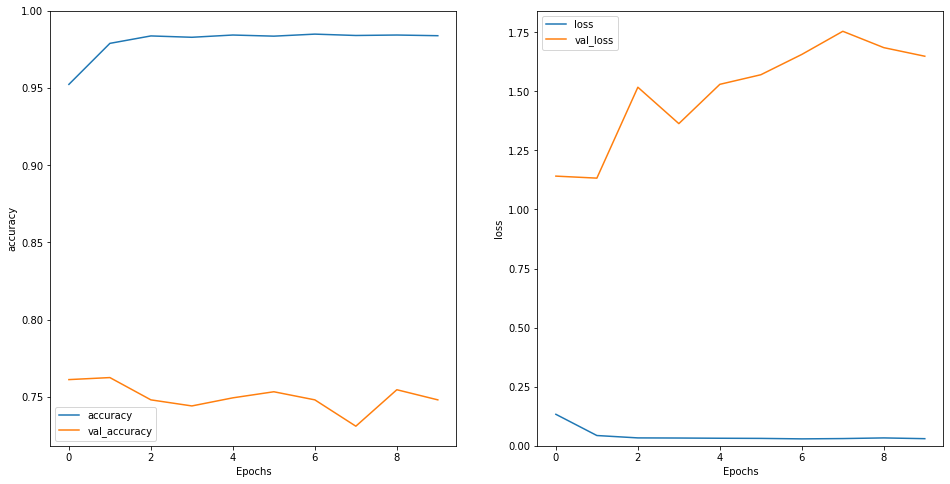

24/24 [==============================] - 0s 2ms/step


(array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32),
 {'Accuracy score': 0.74, 'Precision score': 0.75, 'Recall score': 0.65})

In [ ]:
model_5_preds, model_5_results = model_results(history_5, model_5)
model_5_preds[:10].numpy(), model_5_results

In [ ]:
baseline_metrics

{'Accuracy score': 0.79, 'Precision score': 0.89, 'Recall score': 0.63}

In [ ]:
# Test out our embedding layer, Conv1D layer and max pooling
embedding_text = embedding(text_vectorizer(["this ia a test sentence"]))
conv_1d = layers.Conv1D(filters=32,
                        kernel_size=3,
                        activation="relu",
                        padding="causal")  
conv_1d_output = conv_1d(embedding_text)
max_pool = layers.GlobalMaxPool1D()
max_pool_output = max_pool(conv_1d_output)

embedding_text.shape, conv_1d_output.shape, max_pool_output.shape

(TensorShape([1, 15, 128]), TensorShape([1, 15, 32]), TensorShape([1, 32]))

In [ ]:
max_pool_output

<tf.Tensor: shape=(1, 32), dtype=float32, numpy=
array([[0.12970135, 0.06811327, 0.06875048, 0.0282247 , 0.10564496,
        0.        , 0.09632271, 0.14513084, 0.03457537, 0.10183977,
        0.08197834, 0.08018348, 0.05508677, 0.10569059, 0.1004631 ,
        0.05266316, 0.03960618, 0.03371977, 0.03635955, 0.04146553,
        0.07186618, 0.10614227, 0.06107635, 0.13374126, 0.06639308,
        0.08284851, 0.        , 0.03834437, 0.10588694, 0.08313033,
        0.06490559, 0.09988873]], dtype=float32)>

In [ ]:
# Model 6: Tensorflow Hub Pretrained Sentence Encoder
import tensorflow_hub as hub

embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
embeddings = embed([
    "The quick brown fox jumps over the lazy dog.",
    "I am a sentence for which I would like to get its embedding"
])
embeddings

<tf.Tensor: shape=(2, 512), dtype=float32, numpy=
array([[-0.03133018, -0.06338634, -0.01607501, ..., -0.0324278 ,
        -0.04575739,  0.05370454],
       [ 0.0508086 , -0.01652433,  0.01573778, ...,  0.00976659,
         0.0317012 ,  0.01788116]], dtype=float32)>

In [ ]:
# Build a KerasLayer
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", 
                   input_shape=[],
                   dtype=tf.string,
                   trainable=False,
                   name="USE")

In [ ]:
# Create model using the Sequential API
model_6 = keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name="model_6")

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Fit the model
history_6 = model_6.fit(train_sentences,
            train_labels,
            epochs=10,
            validation_data=(val_sentences, val_labels))

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Epoch 1/10
215/215 [==============================] - 6s 15ms/step - loss: 0.4844 - accuracy: 0.7919 - val_loss: 0.4432 - val_accuracy: 0.8018
Epoch 2/10
215/215 [==============================] - 3s 14ms/step - loss: 0.4028 - accuracy: 0.8234 - val_loss: 0.4344 - val_accuracy: 0.8123
Epoch 3/10
215/215 [==============================] - 2s 11ms/step - loss: 0.3825 - accuracy: 0.8355 - val_loss: 0.4229 - val_accuracy: 0.8163
Epoch 4/10
215/215 [==============================] - 2s 11ms/step - loss: 0.3639 - accuracy: 0.8443 - val_loss: 0.4183 - val_accuracy: 0.8294
Epoch 5/10
215/215 [==============================] - 3s 16ms/step - loss: 0.3434 - accuracy: 0.8545 - val_loss: 0.4312 - val_accuracy: 0.8241
Epoch 6/10
215/215 [==============================] - 2s 12ms/step - loss: 0.3202 - accuracy: 0.8678 - val_loss: 0.4270 - val_accuracy: 0.8228
Epoch 7/10
215/215 [==============================] - 2s 11ms/step - loss: 0.2944 - accuracy: 0.8786 - val_loss: 0.4424 - val_accuracy: 0.8045

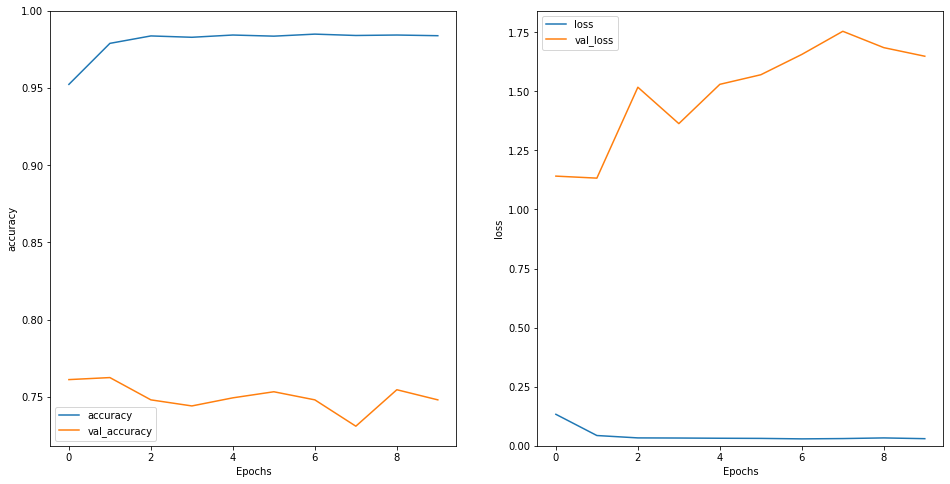

24/24 [==============================] - 1s 8ms/step


(array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32),
 {'Accuracy score': 0.81, 'Precision score': 0.88, 'Recall score': 0.68})

In [ ]:
model_6_preds, model_6_results = model_results(history_6, model_6)
model_6_preds[:10].numpy(), model_6_results

In [ ]:
baseline_metrics

{'Accuracy score': 0.79, 'Precision score': 0.89, 'Recall score': 0.63}

In [ ]:
# Model 7: TF Hub Pretrained USE but with 10% of training data

# Create subset of 10% of the training data
train_10_percent = train_df_shuffled[["text", "target"]].sample(frac=0.1, random_state=42)
train_sentences_10_percent = train_10_percent["text"].tolist()
train_labels_10_percent = train_10_percent["target"].tolist()

In [ ]:
# Build the model
model_7 = keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer="adam",
                metrics=["accuracy"])

# Fit the model
history_7 = model_7.fit(train_sentences_10_percent, 
            train_labels_10_percent,
            epochs=20,
            validation_data=(val_sentences, val_labels))  

Epoch 1/20
24/24 [==============================] - 4s 41ms/step - loss: 0.6540 - accuracy: 0.6491 - val_loss: 0.5690 - val_accuracy: 0.8215
Epoch 2/20
24/24 [==============================] - 1s 21ms/step - loss: 0.4990 - accuracy: 0.8226 - val_loss: 0.3850 - val_accuracy: 0.8556
Epoch 3/20
24/24 [==============================] - 1s 49ms/step - loss: 0.3721 - accuracy: 0.8463 - val_loss: 0.2852 - val_accuracy: 0.8898
Epoch 4/20
24/24 [==============================] - 1s 33ms/step - loss: 0.2856 - accuracy: 0.8949 - val_loss: 0.2080 - val_accuracy: 0.9409
Epoch 5/20
24/24 [==============================] - 1s 22ms/step - loss: 0.2118 - accuracy: 0.9330 - val_loss: 0.1419 - val_accuracy: 0.9711
Epoch 6/20
24/24 [==============================] - 1s 52ms/step - loss: 0.1447 - accuracy: 0.9619 - val_loss: 0.1006 - val_accuracy: 0.9738
Epoch 7/20
24/24 [==============================] - 1s 54ms/step - loss: 0.0912 - accuracy: 0.9763 - val_loss: 0.0595 - val_accuracy: 0.9882
Epoch 8/20
24

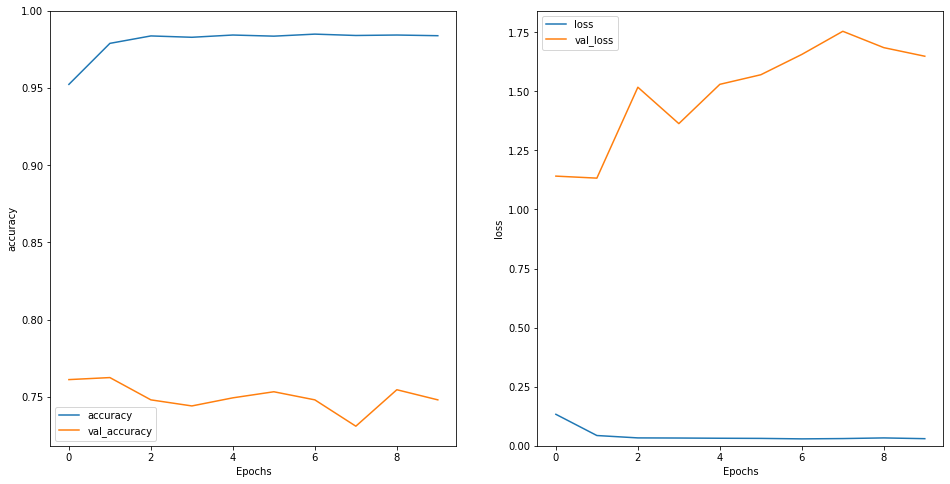

24/24 [==============================] - 1s 9ms/step


(array([0., 1., 1., 1., 1., 1., 1., 1., 1., 0.], dtype=float32),
 {'Accuracy score': 1.0, 'Precision score': 0.99, 'Recall score': 1.0})

In [ ]:
model_7_preds, model_7_results = model_results(history_7, model_7)
model_7_preds[:10].numpy(), model_7_results

In [ ]:
baseline_metrics

{'Accuracy score': 0.79, 'Precision score': 0.89, 'Recall score': 0.63}

In [ ]:
model_7_cloned = keras.models.clone_model(model_7)

In [ ]:
model_7_cloned.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_13 (Dense)            (None, 128)               65664     
                                                                 
 dense_14 (Dense)            (None, 64)                8256      
                                                                 
 dense_15 (Dense)            (None, 32)                2080      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 1)                 17        
                                                                 
Total params: 256,874,369
Trainable params: 76,545
Non-t

In [ ]:
model_7_cloned.compile(loss="binary_crossentropy",
                       optimizer="adam",
                       metrics=["accuracy"])

history_7_cloned = model_7_cloned.fit(train_sentences_10_percent,
                   train_labels_10_percent,
                   epochs=20, 
                   validation_data=(val_sentences, val_labels))

Epoch 1/20
24/24 [==============================] - 5s 65ms/step - loss: 0.6748 - accuracy: 0.6859 - val_loss: 0.6256 - val_accuracy: 0.8045
Epoch 2/20
24/24 [==============================] - 1s 36ms/step - loss: 0.5391 - accuracy: 0.8121 - val_loss: 0.4119 - val_accuracy: 0.8491
Epoch 3/20
24/24 [==============================] - 1s 21ms/step - loss: 0.3919 - accuracy: 0.8463 - val_loss: 0.3103 - val_accuracy: 0.8871
Epoch 4/20
24/24 [==============================] - 1s 22ms/step - loss: 0.3073 - accuracy: 0.8883 - val_loss: 0.2472 - val_accuracy: 0.9199
Epoch 5/20
24/24 [==============================] - 1s 22ms/step - loss: 0.2394 - accuracy: 0.9159 - val_loss: 0.1816 - val_accuracy: 0.9488
Epoch 6/20
24/24 [==============================] - 1s 26ms/step - loss: 0.1711 - accuracy: 0.9488 - val_loss: 0.1174 - val_accuracy: 0.9738
Epoch 7/20
24/24 [==============================] - 1s 22ms/step - loss: 0.1131 - accuracy: 0.9685 - val_loss: 0.0683 - val_accuracy: 0.9843
Epoch 8/20
24

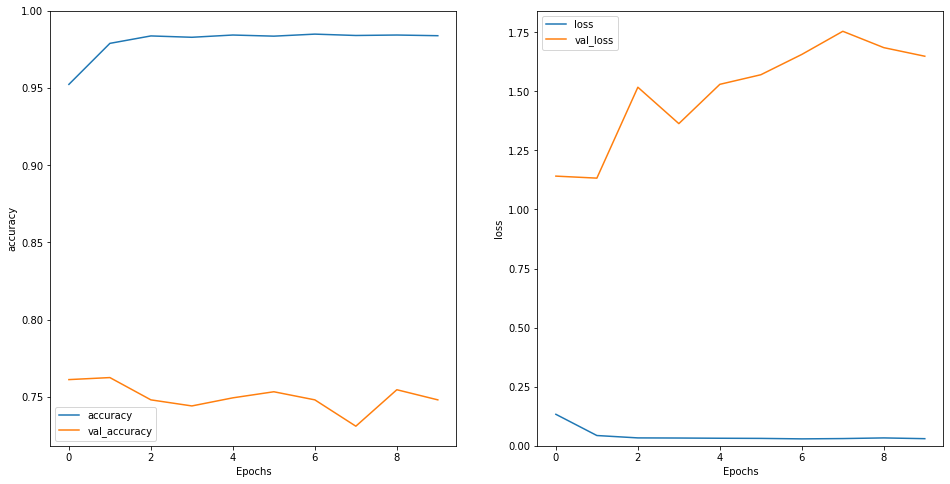

24/24 [==============================] - 1s 10ms/step


(array([0., 1., 1., 1., 1., 1., 1., 1., 1., 0.], dtype=float32),
 {'Accuracy score': 1.0, 'Precision score': 1.0, 'Recall score': 1.0})

In [ ]:
model_7_preds, model_7_results = model_results(history_7_cloned, model_7_cloned)
model_7_preds[:10].numpy(), model_7_results

In [ ]:
val_labels[:10]

[0, 0, 1, 1, 1, 1, 1, 1, 1, 0]

In [ ]:
preds = model_7_cloned.predict([
    "Two lions were killed by the local tribe...",
    "I am very happy today...",
    "There was a hurricane and most of the trees are uprooted."
])
tf.squeeze(tf.round(preds))

1/1 [==============================] - 0s 40ms/step


<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 0., 1.], dtype=float32)>

In [ ]:
# Making a better dataset split (no data leakage)
train_10_percent_split = int(0.1 * len(train_sentences))
train_sentences_10_percent = train_sentences[:train_10_percent_split]
train_labels_10_percent = train_labels[:train_10_percent_split]

In [ ]:
retrained_model_7 = keras.models.clone_model(model_7)

retrained_model_7.compile(loss="binary_crossentropy",
                          optimizer="adam",
                          metrics=["accuracy"])

retrained_history_7 = retrained_model_7.fit(train_sentences_10_percent,
                      train_labels_10_percent,
                      epochs=20,
                      validation_data=(val_sentences, val_labels))

Epoch 1/20
22/22 [==============================] - 4s 49ms/step - loss: 0.6792 - accuracy: 0.6555 - val_loss: 0.6513 - val_accuracy: 0.7454
Epoch 2/20
22/22 [==============================] - 1s 50ms/step - loss: 0.5505 - accuracy: 0.8263 - val_loss: 0.4930 - val_accuracy: 0.7743
Epoch 3/20
22/22 [==============================] - 1s 23ms/step - loss: 0.3886 - accuracy: 0.8394 - val_loss: 0.5070 - val_accuracy: 0.7782
Epoch 4/20
22/22 [==============================] - 1s 28ms/step - loss: 0.3042 - accuracy: 0.8920 - val_loss: 0.5235 - val_accuracy: 0.7690
Epoch 5/20
22/22 [==============================] - 1s 24ms/step - loss: 0.2438 - accuracy: 0.9109 - val_loss: 0.5814 - val_accuracy: 0.7559
Epoch 6/20
22/22 [==============================] - 0s 23ms/step - loss: 0.1842 - accuracy: 0.9474 - val_loss: 0.6347 - val_accuracy: 0.7598
Epoch 7/20
22/22 [==============================] - 0s 22ms/step - loss: 0.1247 - accuracy: 0.9679 - val_loss: 0.7204 - val_accuracy: 0.7480
Epoch 8/20
22

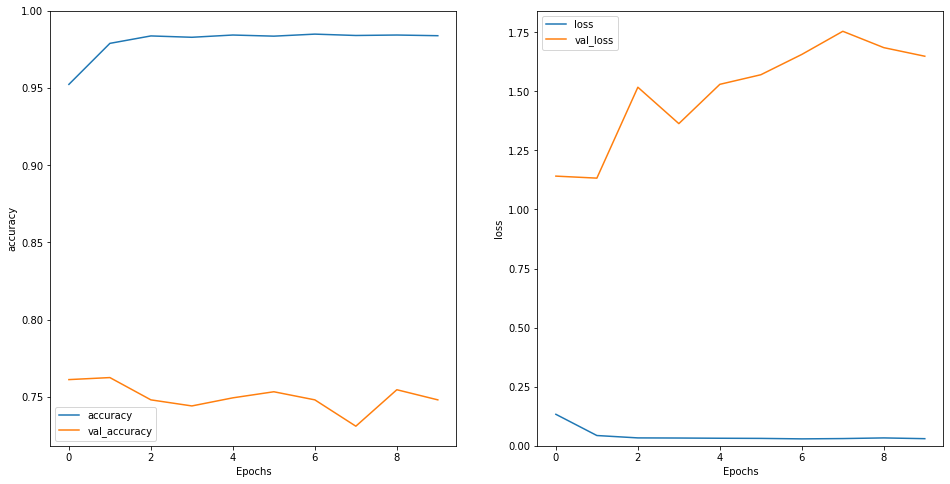

24/24 [==============================] - 1s 12ms/step


(array([0., 0., 1., 1., 1., 0., 1., 1., 1., 0.], dtype=float32),
 {'Accuracy score': 0.74, 'Precision score': 0.73, 'Recall score': 0.67})

In [ ]:
model_7_preds, model_7_results = model_results(retrained_history_7, retrained_model_7)
model_7_preds[:10].numpy(), model_7_results

In [ ]:
pd.Series(train_labels_10_percent).value_counts()

0    406
1    279
dtype: int64

In [ ]:
all_model_results = pd.DataFrame({
    "0_baseline": baseline_metrics,
    "1_simple_dense": model_1_results,
    "2_lstm": model_2_results,
    "3_gru": model_3_results,
    "4_bidirectional": model_4_results,
    "5_conv1d": model_5_results,
    "6_tf_hub_use_encoder": model_6_results,
    "7_tf_hub_use_encoder_10_percent": model_7_results
})
all_model_results = all_model_results.transpose()
all_model_results

,Accuracy score,Precision score,Recall score
0_baseline,0.79,0.89,0.63
1_simple_dense,0.75,0.75,0.68
2_lstm,0.74,0.74,0.68
3_gru,0.75,0.73,0.71
4_bidirectional,0.75,0.74,0.70
5_conv1d,0.74,0.75,0.65
6_tf_hub_use_encoder,0.81,0.88,0.68
7_tf_hub_use_encoder_10_percent,0.74,0.73,0.67


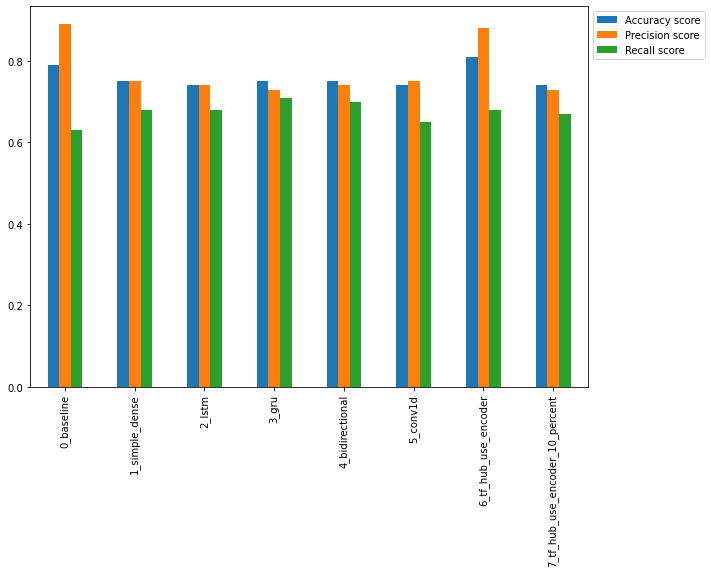

In [ ]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));

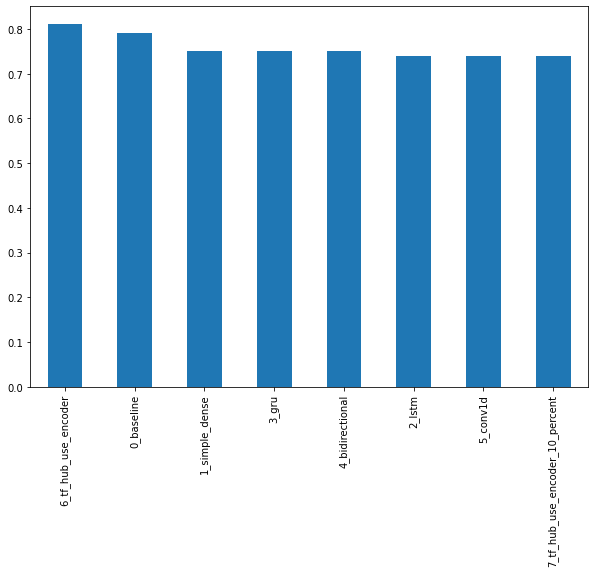

In [ ]:
all_model_results.sort_values("Accuracy score", ascending=False)["Accuracy score"].plot(kind="bar", figsize=(10, 7));